
# Project: Investigate No-show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will investigate a dataset collected from 100k medical appointments in Brazil. We will use the collected patient characteristics to find out the most important factors that affect whether a patient will show up for their scheduled appointment. The dataset consists of rows about medical appointments. Each row represents an appointment made by a patient, it contains information about the appointment such as the date, the location, the SMS service, and whether the patient showed up. Each row also includes details about the patient such as gender, age, participation in the Bolsa program, Hipertension, Diabetes, Alcoholism, Handicap. We will be asking questions like:
<ul>
    <li>what characteristics are most important in predicting whether a patient shows up?</li>
    <li>How often do alcoholic patients show up?</li>
    <li>do older patients show up more often?</li>
    <li>does receiving an sms affect whether a patient shows up?</li>
</ul>

## Data columns:
PatientId: Identification of a patient

AppointmentID: Identification of each appointment

Gender: Male or Female

AppointmentDay: The day of the actuall appointment, when they have to visit the doctor

ScheduledDay: The day someone registered the appointment

Age: How old is the patient

Neighbourhood: Where the appointment takes place

Scholarship: True or False, indicates if the patient is in the Bolsa program

Hipertension: True or False

Diabetes: True or False

Alcoholism: True or False

Handcap: True or False

SMS_received: whether or not a message was sent to the patient

No-show: "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

In [1]:
#import libraries needed in this project
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import re
sns.set()

<a id='wrangling'></a>
## Data Wrangling
This is the beginning of our wrangling process.

## Data assessing
In this section, we take a general look at the data. We then check the datatypes and the number of rows and columns. Next, we check if there are any duplicates or null values.

In [2]:
#read from the csv file into a pandas dataframe
df=pd.read_csv('noshow.csv')

In [3]:
#show the first few rows in the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#show the data types of all columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#show the size of the dataframe in number of rows and columns
df.shape

(110527, 14)

In [6]:
#show information on the columns: detailed data types, and number of non-null rows in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#check if there are any duplicate rows in the dataframe
df.duplicated().any()

False

In [8]:
#check if there are any null values in all columns
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

We have no duplicates and no missing data, that's great.


### Data Cleaning
we now proceed to clean up our appointments data to prepare it for analysis.

We will drop the columns PatientId and AppointmentID because they are specific details to a patient, we do not need that kind of detail for our analysis. We will also drop AppointmentDay because it just represents the same date in the column ScheduledDay.

In [9]:
df.drop(['PatientId','AppointmentDay','AppointmentID'],axis=1,inplace=True)

In [10]:
#show the top few rows of our dataframe after dropping
df.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#check the data type of scheduled day column
df['ScheduledDay'].dtype

dtype('O')

Scheduled day should be of type datetime and so we will convert it.

In [12]:
#changing scheduled day column to type datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [13]:
#inspect scheduled day data type after change
df['ScheduledDay'].dtype

dtype('<M8[ns]')

Let's rename our columns to make the titles consistent.

In [14]:
#clean column titles
df.rename(columns=lambda x: re.sub( '(?<!^)(?=[A-Z])', '_', x ).lower().replace('-','_'), inplace=True)

In [15]:
#check columns after renaming
df.columns

Index(['gender', 'scheduled_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 's_m_s_received',
       'no_show'],
      dtype='object')

In [16]:
#the sms column title needs to be fixed, we'll do it manually
df.rename(columns={'s_m_s_received':'sms_received'},inplace=True)
df.columns

Index(['gender', 'scheduled_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

The No_show column is quite confusing this way. Let's change it so True means the patient showed up and vice verse.

In [17]:
#map every Yes value to False and every No value to True in the No_show column
df['no_show']=df['no_show'].map({'Yes':False,'No':True})

In [18]:
#rename the No_show column to describe the new meaning
df.rename(columns={'no_show':'show_up'},inplace=True)

In [19]:
#checking the new column name "show_up"
df.head()

,gender,scheduled_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,True


In [20]:
#inspect the Age column
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

We can see that age has some wrong values below or equal 0, let's fix that

In [21]:
#drop all rows that have age value less than or equal zero
df.drop(df[df['age']<=0].index,inplace=True)

In [22]:
#reinspect the age column
df['age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [23]:
#let's check the duplicates after the columns drop operation
df.duplicated().sum()

626

In the data wrangling process, we dropped 3 columns that are irrelevant to our investigation. Furthermore, we corrected the data type for Scheduled day column. All columns were then renamed to a consistent format of lowercase seperated by underscore. In addition, the no show column was changed to a clearer form, we mapped its contents to True and False, where True means the patient attended the appointment, and False means they missed it, and also changed the column title to communicate the new form.

The age column was found to have some outliers, so we dropped the rows with outliers.

After the column dropping, some rows are now duplicated. However, these rows are not to be dropped because they repesent different patient appointments and are viable to our statistical conclusions.

<a id='eda'></a>
## Exploratory Data Analysis

Now we are ready to perform our exploration. Let's start with dividing our data to two groups: those who showed up for their appointment and those who didn't show up.

In [24]:
no_show=df.query('show_up == False')
yes_show=df.query('show_up == True')
#make sure the sum of both groups equals the original size of the dataframe
len(no_show)+len(yes_show)==len(df)

True

In [25]:
#let's see the percentage of patients that don't show up vs the patients that show up
print(len(no_show)/len(df)*100,len(yes_show)/len(df)*100)

20.26414424182377 79.73585575817623


so about 20% of the patients don't show up to their appointments! Let's investigate more.

### Question 1: Does receiving an SMS on the appointment affect whether the patient shows up?

In [26]:
df.groupby('show_up').mean()['sms_received']

show_up
False    0.441328
True     0.293258
Name: sms_received, dtype: float64

#### From the mean, it seems that those who showed up mostly did not receive a message. Let's investigate more.

In [27]:
#set the indeces array of the chart
ind= np.arange(1)

#set the width of the bars
width=0.35

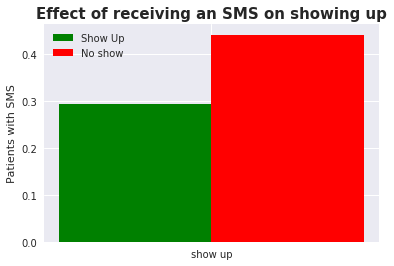

In [28]:
#calculate the proportion from patients that showed up who received an SMS
show_up_proportion=plt.bar(ind,yes_show['sms_received'].sum()/len(yes_show),width,color='g',label='Show Up')

#calculate the proportion from patients that didn't show up who received an SMS
no_show_proportion=plt.bar(ind+width,no_show['sms_received'].sum()/len(no_show),width,color='r',label='No show')

#titles and labels
plt.ylabel('Patients with SMS')
plt.title('Effect of receiving an SMS on showing up',fontweight='bold',fontsize='15')
locations = ind + width /2
labels=['show up', 'no show']
plt.xticks(locations,labels)

#legend
plt.legend()

#show plot
plt.show()

The bar chart shows that more than 40% of patients who missed their appointment received an SMS, wheras less than 30% of patients that showed up received an SMS.

### Question 2: Does alcoholism affect showing up tp the appointment?

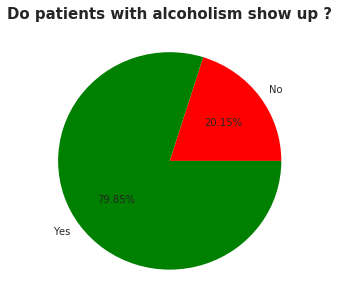

In [29]:
#calculate the sum of alcoholics that showed up and didn't show up to their appointment
alcoholics=[no_show['alcoholism'].sum(),yes_show['alcoholism'].sum()]

#chart labels
label=['No','Yes']

#set the figure size
plt.figure(figsize=(5,5))

#set the figure title
plt.title('Do patients with alcoholism show up ?', fontweight='bold',fontsize='15')

#plot with floating accuracy 2 ,using the label, and using red and green colors
plt.pie(alcoholics,labels=label,autopct='%1.2f%%',colors=['r','g'])
plt.show()

we can see that only about 20% of patients with alcoholism did not show up to the appointment. This means that patients with alcoholism have a high chance of showing up.

### Question 3: How does having a scholarship affect the commitment to the appointment?

To further understand the shcolarship column, let's see the percentage of patients who have a scholarship.

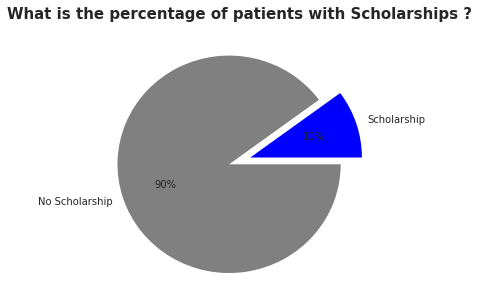

In [30]:
#get the counts of patients with scholarship, and those without.
scholar=df.query('scholarship==1').count()['scholarship']
no_scholar=df.query('scholarship==0').count()['scholarship']

#set the figure size
plt.figure(figsize=(5,5))

#set the labels
labels=['Scholarship','No Scholarship']

#set the colors
colors=['blue','grey']

#set the explosion of pies
explode=(0.1,0.1)

plt.title('What is the percentage of patients with Scholarships ?', fontweight='bold',fontsize='15')
plt.pie([scholar,no_scholar],autopct='%1.0f%%',explode=explode,labels=labels,colors=colors)
plt.show()

Now, let's explore the relation of scholarship to showing up to the appointment.

In [31]:
#compare the mean showing up for patients with and without scholarship
print('Scholarship:',round(df.query('scholarship==1')['show_up'].mean(),3))
print('No scholarship:',round(df.query('scholarship==0')['show_up'].mean(),3))

Scholarship: 0.762
No scholarship: 0.801


In [32]:
ind = np.arange(2)  # the x locations for the groups
width = 0.35       # the width of the bars

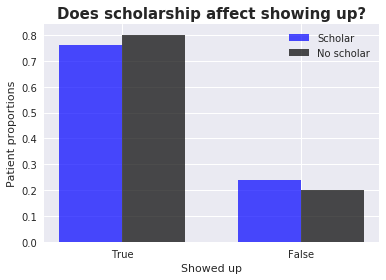

In [33]:
#get the proportions of patients with scholarships vs without who show up and don't show up.
scholar=df.query('scholarship==1')['show_up'].value_counts()/scholar
others=df.query('scholarship==0')['show_up'].value_counts()/no_scholar

#prepare and plot the bar chart
plt.bar(ind, scholar, width, color='blue', alpha=.7, label='Scholar')
plt.bar(ind+width, others, width, color='black', alpha=.7, label='No scholar')

# title and labels
plt.xlabel('Showed up')
plt.ylabel('Patient proportions')
plt.title('Does scholarship affect showing up?', fontweight='bold',fontsize='15')


#location and label
location = ind + width /2
label=scholar.index
plt.xticks(location,label)

# legend
plt.legend()

plt.show()

The plot shows that patients with a scholarship show up less often than those without one.

### Question 4: What age group is associated with showing up?

First, let's check the age column distribution.

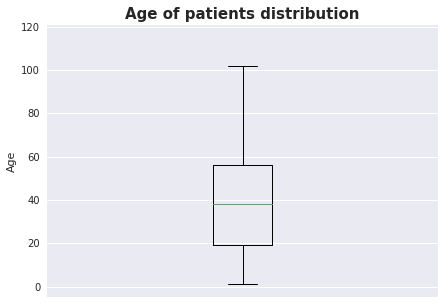

In [34]:
#set figure size
fig = plt.figure(figsize =(7, 5))
  
# Creating plot
plt.boxplot(df['age'])

#title
plt.title('Age of patients distribution', fontweight='bold',fontsize='15')

#labels
plt.ylabel('Age')
plt.xticks([],'')
# show plot
plt.show()

We can see that the median is around age 40, and about 25% of the patients are over the age of 60.

In [35]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [df['age'].min(),2,16,30,45,df['age'].max()]
bin_edges

[1, 2, 16, 30, 45, 115]

In [36]:
# names for the five age groups
bin_names=['baby','child','young adult','middle age','old']

In [37]:
# Create age group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,gender,scheduled_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up,age_group
0,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,True,old
1,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,True,old
2,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,True,old
3,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,child
4,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,True,old


In [38]:
# get the mean showing up probability of each age group
age_mean_show = df.groupby('age_group')['show_up'].mean()
age_mean_show

age_group
baby           0.844252
child          0.767082
young adult    0.752593
middle age     0.786280
old            0.833795
Name: show_up, dtype: float64

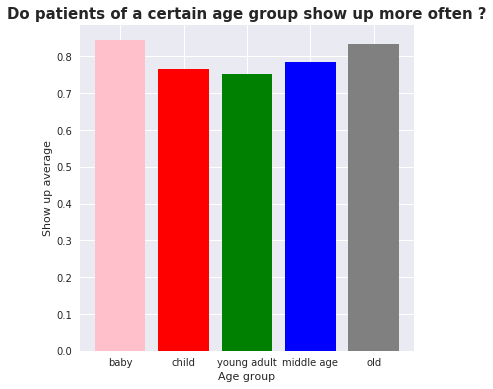

In [39]:
#create an array for the x locations of the bars
locations=np.arange(5)

#set the bar labels as the index of the grouped dataframe
labels=age_mean_show.index

#set the bar heights as the values of the age group's mean showing up
heights=age_mean_show.values

#set the figure size
plt.figure(figsize=(6,6))

#create a list for the bars colors
color=['pink', 'red', 'green', 'blue', 'grey']

#plot the bar chart
plt.bar(locations,heights,tick_label=labels,color=color)

#set axes labels
plt.xlabel('Age group')
plt.ylabel('Show up average')

#set the title
plt.title('Do patients of a certain age group show up more often ?', fontweight='bold',fontsize='15')
plt.show()

The bar chart shows that the age groups of babies and old patients have the highest average showing up value, while young adults have the lowest.

### Conclusions
From our analysis, we first conclude that the SMS messaging is not a main factor we can use to predict the patient's commitment to the appointment. 70% of patients that showed up never received an SMS, and 40% of patients that missed the appointment did receive an SMS.

Secondly, we deduce that most patients with alcoholism (about 80%) show up to their appointment, so this is a valid factor: If a patient has alcoholism, they will most likely show up.

Thirdly, we explore the scholarship column. We observe that only 10% of patients are participated in the Bolsa program. We then discover that patients that are part of the bolsa program show up slightly less often than the others outside the program.

Lastly, by exploring the age column, the visualization showed that about qaurter the patients are elders. Then, we engineered a new feature to divide the age groups. By exploring the new feature, we realized that young adults are the most likely age group to miss their appointment, while appointments for babies and elders are the most likely to be attended.

### Limitations
The dataset is missing some variables that can be useful in the prediction such as: the speciality of the medical appointment reserved eg. cardiology, dermatology, hematology etc. It can be useful to also include information about whether the appointment is a first or a follow-up. In addition, the documentation of the data is not enough to understand scheduled day and appointment day.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0